# Solar

Analyze and visualize solar production.

In [72]:
import pandas as pd
import numpy as np
import feather
import datetime

import matplotlib.pyplot as plt
from matplotlib import RcParams
import seaborn as sns

solaire = pd.read_feather('data/solaire.ftr')

sns.set_style = "seaborn-whitegrid"

color = "#333"

sns.set(
    rc={
        "font.style": "normal",
        "axes.facecolor": "white",
        "grid.color": ".8",
        "grid.linestyle": "-",
        "figure.facecolor": "white",
        "axes.titlesize": 16,
        "text.color": color,
        "xtick.color": color,
        "ytick.color": color,
        "axes.labelcolor": color,
        "axes.titlecolor": color,
        "axes.titlepad": 18,
        "axes.grid": True,
        "axes.labelsize": 12,
        "xtick.labelsize": 10,
        "font.size": 12,
        "ytick.labelsize": 10,
        "legend.title_fontsize": 10,
    }
)

solaire['date'] = pd.to_datetime(solaire['date'], utc=True)

solaire['annee'] = solaire['date'].dt.year
solaire['mois'] = solaire['date'].dt.month
solaire['jour'] = solaire['date'].dt.day
solaire['heure'] = solaire['date'].dt.hour

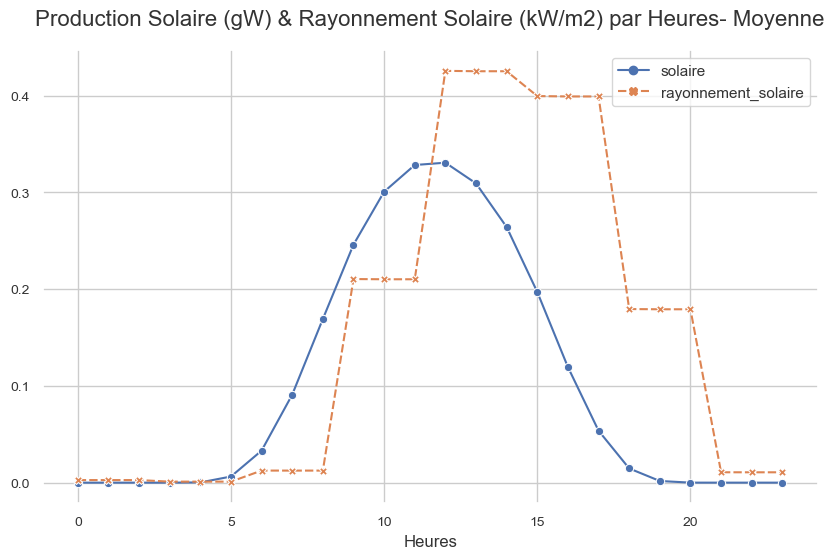

In [73]:
solar_by_hour= solaire.groupby('heure')[['solaire', 'rayonnement_solaire']].mean()

fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
sns.lineplot(data=solar_by_hour, markers=True, ax=ax)
ax.set_title('Production Solaire (gW) & Rayonnement Solaire (kW/m2) par Heures- Moyenne')
ax.set_xlabel('Heures')
plt.show()

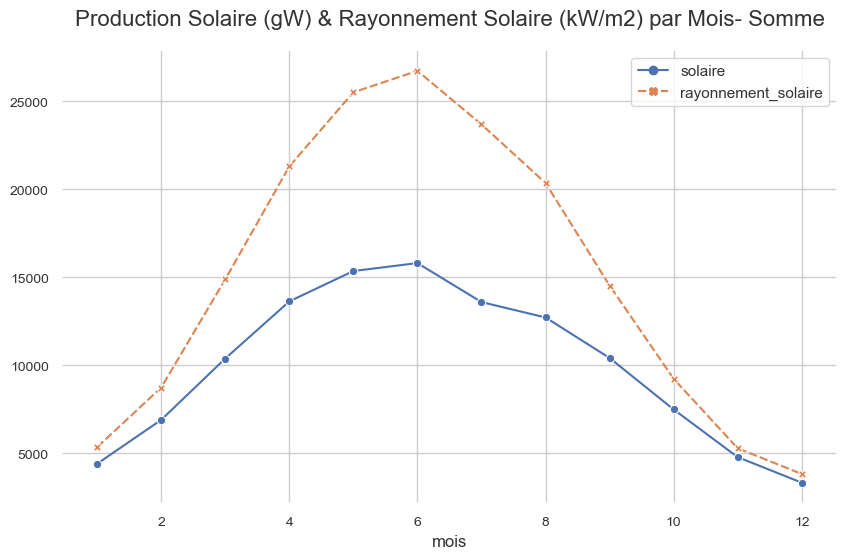

In [74]:
solar_by_month= solaire.groupby('mois')[['solaire', 'rayonnement_solaire']].sum()

fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
sns.lineplot(data=solar_by_month, markers=True, ax=ax)
ax.set_title('Production Solaire (gW) & Rayonnement Solaire (kW/m2) par Mois- Somme')
plt.show()


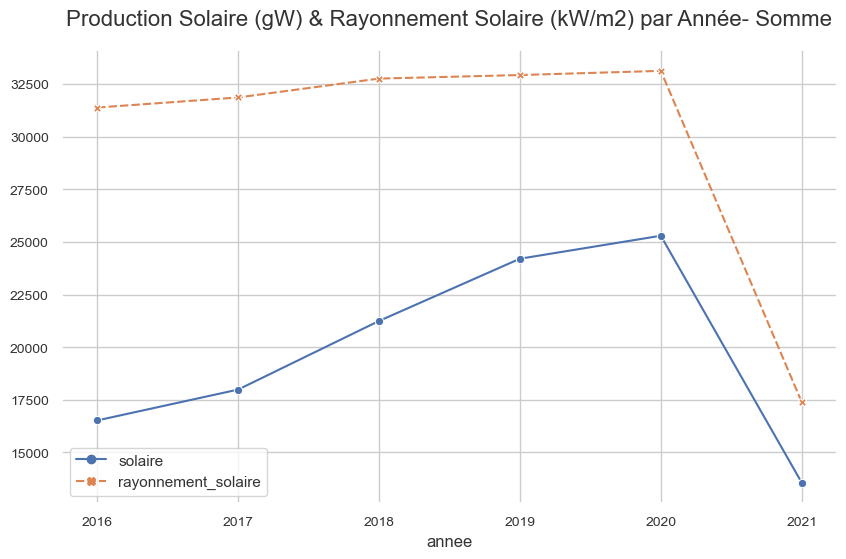

In [75]:
solar_by_year = solaire.groupby('annee')[['solaire', 'rayonnement_solaire']].sum()

fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
sns.lineplot(data=solar_by_year, markers=True, ax=ax)
ax.set_title('Production Solaire (gW) & Rayonnement Solaire (kW/m2) par Année- Somme')
plt.show()

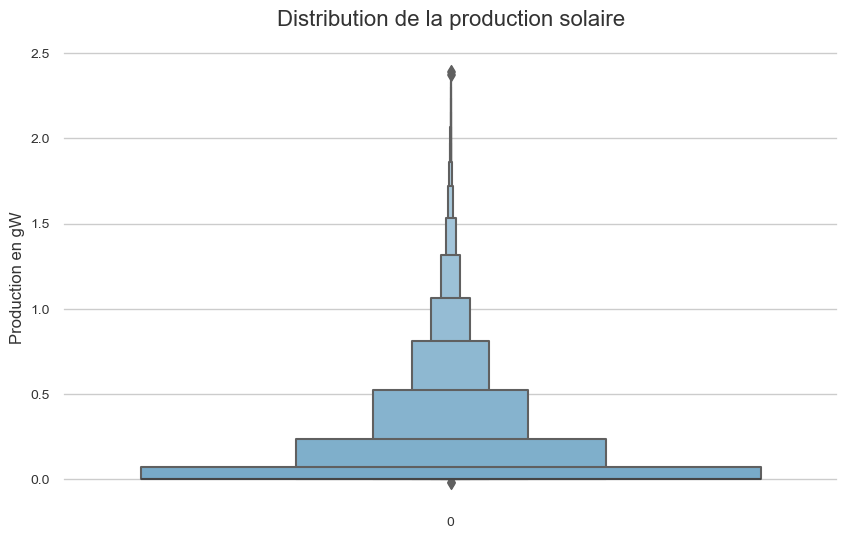

In [79]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
sns.boxenplot(data=solaire['solaire'], ax=ax, palette='Blues')
ax.set_ylabel('Production en gW')
ax.set_title('Distribution de la production solaire')
plt.show()


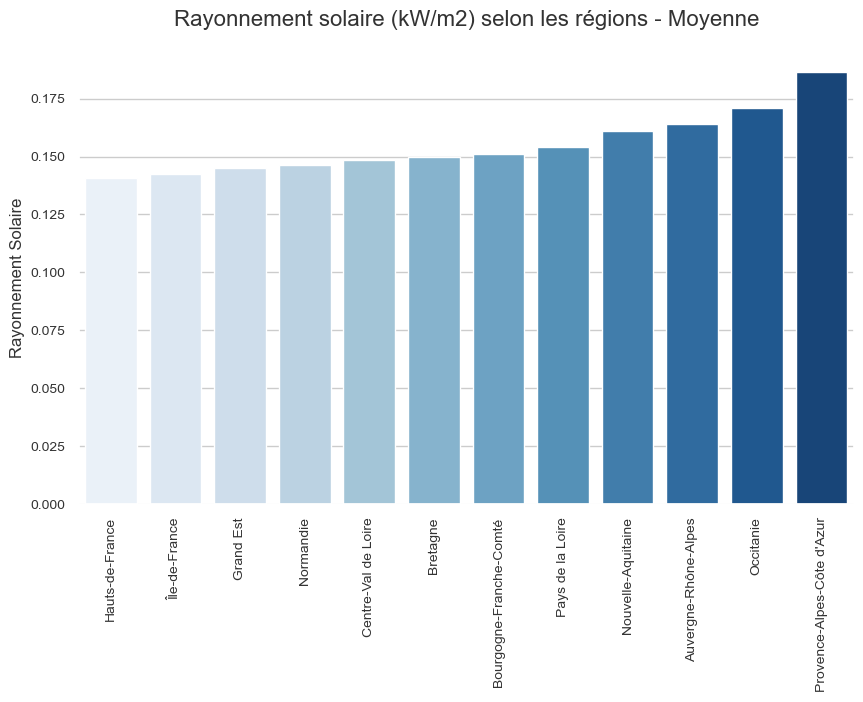

In [77]:
grp_rayonnement = solaire.groupby(['region'])[['rayonnement_solaire']].mean().reset_index()
grp_rayonnement_sorted = grp_rayonnement.sort_values(by='rayonnement_solaire', ascending=True)


fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
sns.barplot(x='region', y='rayonnement_solaire', data=grp_rayonnement_sorted, ax=ax, ci=False, palette='Blues')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

ax.set_xlabel(None)
ax.set_ylabel('Rayonnement Solaire')

ax.set_title('Rayonnement solaire (kW/m2) selon les régions - Moyenne')
plt.show()

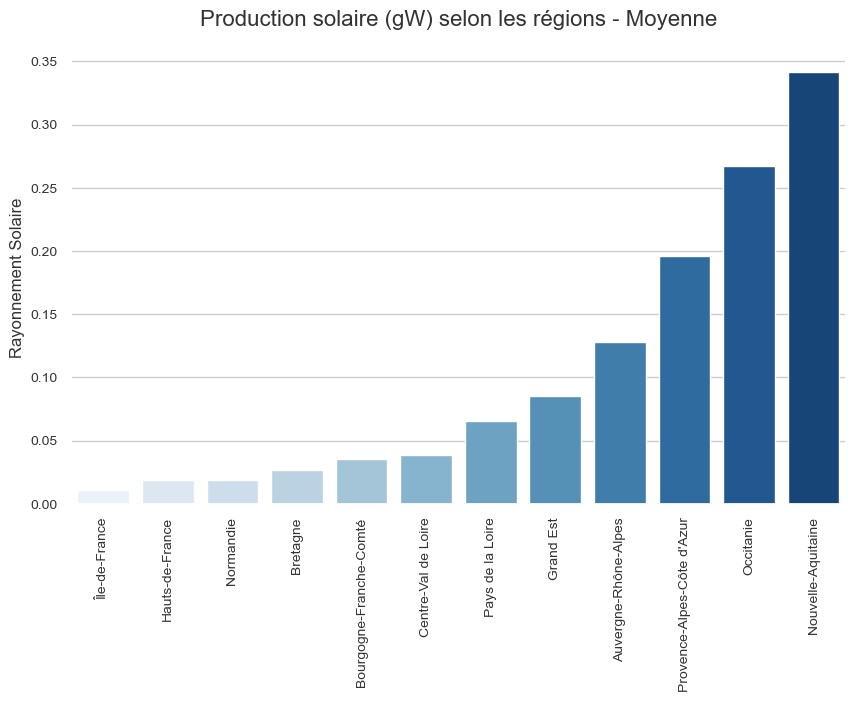

In [78]:
grp_solaire = solaire.groupby(['region'])[['solaire']].mean().reset_index()
grp_solaire_sorted = grp_solaire.sort_values(by='solaire', ascending=True)


fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
sns.barplot(x='region', y='solaire', data=grp_solaire_sorted, ax=ax, ci=False, palette='Blues')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

ax.set_xlabel(None)
ax.set_ylabel('Rayonnement Solaire')

ax.set_title('Production solaire (gW) selon les régions - Moyenne')
plt.show()